Speech Processing Assignment

NAME : VIVEK KUMAR BHARATI<br>
ROLL NO : 22M1081

In [1]:
import matplotlib.pyplot as plt
import math
import cmath
import numpy as np
import scipy
from scipy.io.wavfile import write
from IPython.display import Audio

Question 1: Given the following specification for a single-formant resonator, obtain the transfer function of
the filter H(z) from the relation between resonance frequency / bandwidth, and the pole angle /
radius. Plot filter magnitude response (dB magnitude versus frequency) and impulse response.

F1 (formant) = 900 Hz 

B1(bandwidth) = 200 Hz 

Fs (sampling freq) = 16 kHz 

Solution: Given Formant, Bandwidth and Sampling frequency as follows
           
  F1 (formant) = 900 Hz 

  B1(bandwidth) = 200 Hz 

  Fs (sampling freq) = 16 kHz 
           
  Second order transfer function for Single Formant Frequency is calculated as follows
           
          
       
           
           

$H(z) = \frac{1}{(1-re^j\theta z^-1)(1-re^-j\theta z^-1)}$

above function is simplified as 

$H(z) = \frac{1}{(1- 2 r cos\theta z^{-1}+r^{2}z^{-2})}$

where $\theta_i$ and $r_i$ is defined as

$\theta_i = 2\pi F_iT$

$r_i = e^{-B_i\pi T}$  and the value of $T = \frac{1}{F_s} = \frac{1}{16000}\sec$

Substituting given value in above (single formant frequency is given so i = 1)

$ \theta_1 = 0.1125\pi$

$r_1 = 0.9615$


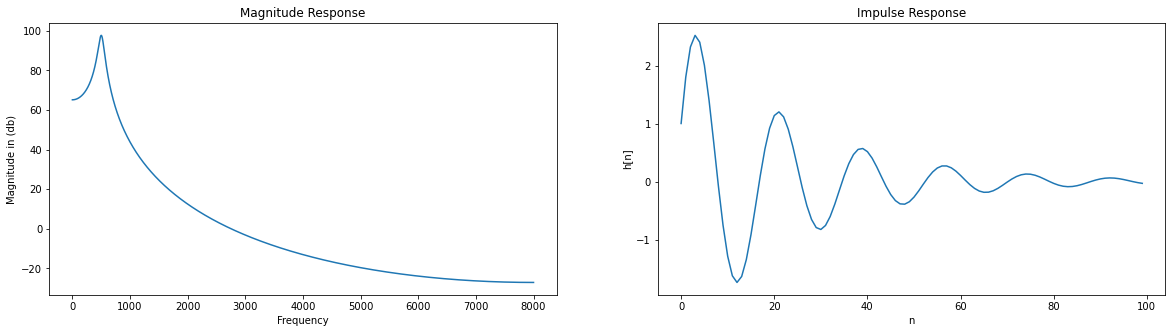

In [12]:
import numpy as np
import matplotlib.pyplot as plt

w = np.arange(0,np.pi,.0001)
freq_hz = (16000/(2*np.pi))*w
theta = 2*np.pi*900*(16000)
r = np.exp(-200*np.pi*(1/16000))
function = 1/(1-2*r*np.cos(theta)*np.exp(-1j*w)+r*np.exp(-2j*w))
mag = 20*np.log(abs(function))
plt.rcParams["figure.figsize"] = (20,5)
plt.subplot(1, 2, 1)
plt.plot(freq_hz,mag)
plt.xlabel('Frequency')
plt.ylabel('Magnitude in (db)')
plt.title('Magnitude Response')

h = np.zeros(100)
n = np.arange(0,100,1)
h[0]=1
h[1]=1.80

for i in range(2,100):
    h[i]= 1.80*h[i-1]-.92*h[i-2]

plt.subplot(1, 2, 2)
plt.plot(n,h)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Impulse Response')
plt.show()

## Impulse Response
Impulse Response is defined as $H(z)=\frac{Y(z)}{X(z)}$

or

$X(z) =\frac{Y(z)}{ H(z)}$

Putting H(z) in the above equation:

$X(z) = {Y(z)}{ (1-1.80z^{-1}+0.92z^{-2})}$



$X(z) = { ({Y(z)}-1.80z^{-1}{Y(z)}+0.92z^{-2}{Y(z)})}$

Take inverse-z transform(Assuming zero initial conditions):

i.e. y[-1]=0 , y[-2]=0

x[n] = y[n] - 1.80y[n-1] + 0.92y[n-2]    

For Impulse response, input given to the system is impulse i.e. 

$x[n] = \delta [n]$

$\delta [n] = y[n] - 1.80y[n-1] +0.92y[n-2] $

We know Impulse Response of a system is the output of the system for impulse input

so h[n] = y[n]

$\delta [n] = h[n] - 1.80h[n-1] +0.92h[n-2] $

As h[-1] = h [-2] = 0

for n = 0

$\delta [0] = h[0] - 1.80h[-1] +0.92h[-2] $

$h[0] = 1$

similarly, for n = 1

$\delta [1] = h[1] - 1.80h[0] +0.92h[-1]$ 

$ 0 = h[1] - 1.80 + 0$

$h[1] = 1.80$


Other values of h[n] is calculated using python code

$h[n] = 1.80h[n-1] - 0.92h[n-2] + \delta[n]$

Quetion 2: Excite the above resonator (“filter”) with a periodic source excitation of F0 = 160 Hz. You can
approximate the source signal by a narrow-triangular pulse train. Compute the output of the
source-filter system over the duration of 0.5 second using the difference equation implementation
of the LTI system. Plot the time domain waveform over a few pitch periods so that you can
observe waveform characteristics. Play out the 0.5 sec duration sound and comment on the
sound quality.

Solution :

Given frequency of source excitation(F0) = 160 Hz

   Output is taken for 0.5 sec of duration.
   
   F1 (formant) = 900 Hz 

   B1(bandwidth) = 200 Hz 

   Fs (sampling freq) = 16 kHz 
      
      
      

As Fs is given 16000 samples/sec and F0 is 160 cycles/sec therefor i have to take 16000/160 = 100 samples/cycle
and take total 80 cycles so that 100 * 80 = 8000 samples.


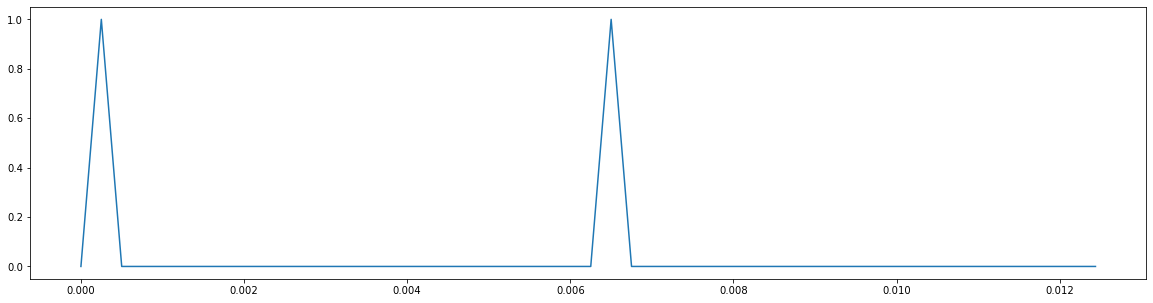

In [13]:
# Construction of exciation signal
f0 = 160
fs = 16000
excitation_array = np.zeros((int(1/f0*fs)))
triangle_width = 9
pk_value = 1
excitation_array[0:int((triangle_width+1)/2)] = np.linspace(0,pk_value,int((triangle_width+1)/2))
excitation_array[int((triangle_width+1)/2):triangle_width] = np.linspace(pk_value,0,int((triangle_width+1)/2))[1:] 
excitation_array = list(excitation_array)

duration = 0.5
#printing (excitation signal) of duration 0.5 sec
excitation_signal = excitation_array*int(duration*f0)
ts = np.linspace(0,duration,int(fs*duration))

plt.figure(figsize=(20,5))
plt.plot(ts[:200],excitation_signal[:200])
plt.show()

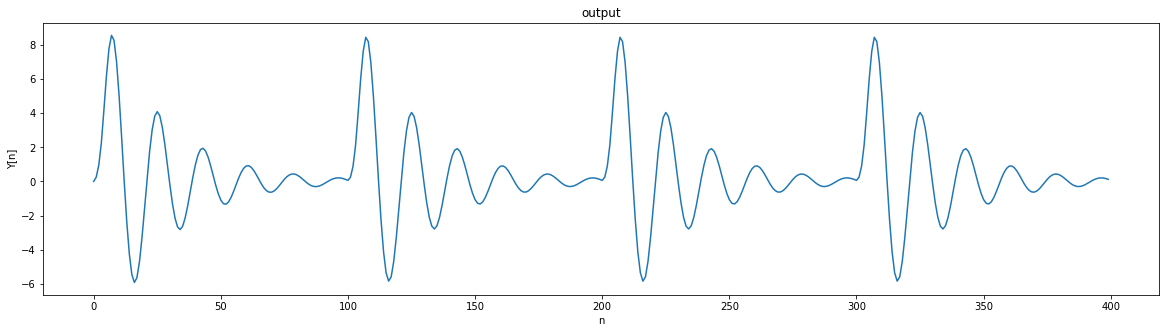

In [14]:
samples = int(0.5*fs)
y = np.zeros(samples)
n = np.arange(0,samples,1)
x = excitation_signal
y[0]= x[0]
y[1] = 1.80*y[0]+x[1]


for i in range(2,samples):
    y[i]= 1.80*y[i-1]-.92*y[i-2]+x[i]

plt.figure(figsize=(20,5))
plt.plot(n[:400],y[:400])
plt.xlabel('n')
plt.ylabel('Y[n]')
plt.title('output')

plt.show()

Question 4: In place of the simple single-resonance signal, synthesize the following more realistic vowel
sounds at two distinct pitches (F0 = 120 Hz, F0 = 220 Hz). Keep the bandwidths constant at 100
Hz for all formants. Duration of sound: 0.5 sec. Comment on the sound quality across the
different sounds. Plot a few periods of any 2 examples.<br>
Vowel F1, F2, F3<br>
/a/ 730, 1090, 2440<br>
/i/ 270, 2290, 3010<br>
/u/ 300, 870, 2240<br>
(Optional: Use glottal pulse

[0.2866703296400686, 0.42804199905160933, 0.9581857593448869]


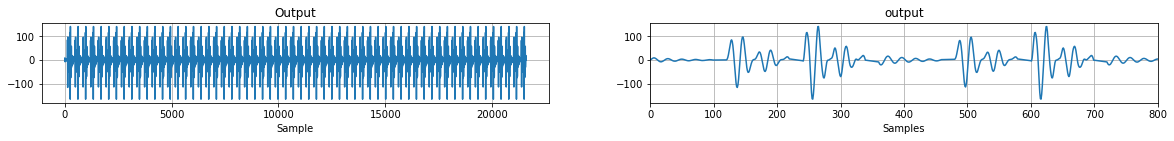

In [15]:
# for F0 =120 Hz
F0 = 120
Fs = 16000
B = 100
F1 = np.array([730,1090,2440])
Theta = []
i = 0
for i in range(3):
    k=2*(math.pi)*(F1[i]/Fs)
    Theta.append(k)
    i=i+1
k=0
print(Theta)

cost = []
i = 0
for i in range(3):
    k=math.cos(Theta[i])
    cost.append(k)
    i=i+1
k=0

R = math.exp(-1*np.pi*(B/16000))
cost = []

input = []
i = 0 
while i<5 :
    input.append((10-2*i)/10)
    i = i+1
i = 0

while i<110 :
    input.append(0)
    i = i+1    
i = 0

while i<5:
    input.append((2+2*i)/10)
    i = i+1
i = 0

display = []
ts = []
i = 0
a = 0 
for a in range(int(F0/2)):
               while i<len(input):
                   display.append(input[i])
                   ts.append(i+a*len(input))
                   i = i + 1
               i = 0

output = []

out = 0
out1 =0
out2 = 0 
output1=[]
output2=[] 
final = []
n = []
i= 0

k = 0 
while i<60 :
    j = 0
    k = k+1
    while j<100:
        out2 = out1
        out1 = out
        out = input[j]+(2*R*math.cos(Theta[0])*out1) -(R*R*out2)
        n.append(((k-1)*120)+j)
        output1.append(out)
        output.append(out)
        j = j+1
    
    j = 0
    k = k+1
    while j<100:
        out2 = out1
        out1 = out
        out = output1[j]+(2*R*math.cos(Theta[1])*out1) -(R*R*out2)
        n.append(((k-1)*120)+j)
        output2.append(out)
        output.append(out)
        j = j+1
    j = 0
    k = k+1
    while j<100:
        out2 = out1
        out1 = out
        out = output2[j]+(2*R*math.cos(Theta[2])*out1) -(R*R*out2)
        n.append(((k-1)*120)+j)
        output.append(out)
        j = j+1   
    i = i+1

output = np.array(output)
plt.subplot(323)
plt.grid()
plt.xlabel("Sample")
plt.title("Output")
plt.plot(n,output)

plt.subplot(324)
plt.grid()
plt.xlim(0,800)
plt.xlabel("Samples")
plt.title("output")
plt.plot(n,output)

plt.show()

Audio(output,rate = 16000)


[0.2866703296400686, 0.42804199905160933, 0.9581857593448869]


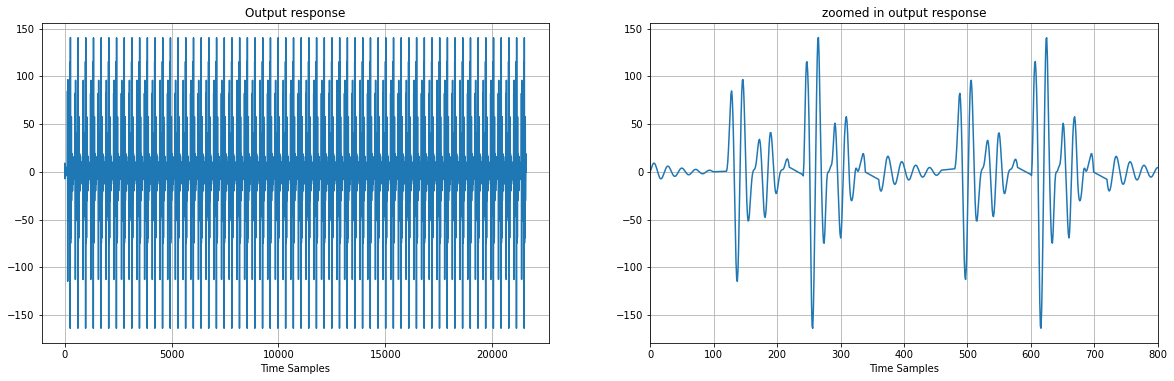

In [16]:
#for F0 =220 Hz
F0 = 220
Fs = 16000
B = 100
F1 = np.array([730,1090,2440])
Theta = []
i = 0
for i in range(3):
    k=2*(math.pi)*(F1[i]/Fs)
    Theta.append(k)
    i=i+1
k=0
print(Theta)

cost = []
i = 0
for i in range(3):
    k=math.cos(Theta[i])
    cost.append(k)
    i=i+1
k=0

R = math.exp(-1*np.pi*(B/16000))
cost = []

input = []
i = 0 
while i<5 :
    input.append((10-2*i)/10)
    i = i+1
i = 0

while i<210 :
    input.append(0)
    i = i+1    
i = 0

while i<5:
    input.append((2+2*i)/10)
    i = i+1
i = 0

display = []
ts = []
i = 0
a = 0 
for a in range(int(F0/2)):
               while i<len(input):
                   display.append(input[i])
                   ts.append(i+a*len(input))
                   i = i + 1
               i = 0

            
output = []

out = 0
out1 =0
out2 = 0 
output1=[]
output2=[] 

n = []
i= 0

k = 0 
while i<60 :
    j = 0
    k = k+1
    while j<100:
        out2 = out1
        out1 = out
        out = input[j]+(2*R*math.cos(Theta[0])*out1) -(R*R*out2)
        n.append(((k-1)*120)+j)
        output1.append(out)
        output.append(out)
        j = j+1
    j = 0
    k = k+1
    while j<100:
        out2 = out1
        out1 = out
        out = output1[j]+(2*R*math.cos(Theta[1])*out1) -(R*R*out2)
        n.append(((k-1)*120)+j)
        output2.append(out)
        output.append(out)
        j = j+1
    j = 0
    k = k+1
    while j<100:
        out2 = out1
        out1 = out
        out = output2[j]+(2*R*math.cos(Theta[2])*out1) -(R*R*out2)
        n.append(((k-1)*120)+j)
        output.append(out)
        j = j+1   
    i = i+1

output = np.array(output)

plt.rcParams["figure.figsize"] =(20,20)
plt.subplot(323)
plt.grid()
plt.xlabel("Time Samples")
plt.title("Output response")
plt.plot(n,output)

plt.subplot(324)
plt.grid()
plt.xlim(0,800)
#plt.ylim(-15,15)
plt.xlabel("Time Samples")
plt.title("zoomed in output response")
plt.plot(n,output)

plt.show()

Audio(output,rate = 16000)


[0.10602875205865553, 0.8992808970900783, 1.1820242359131596]


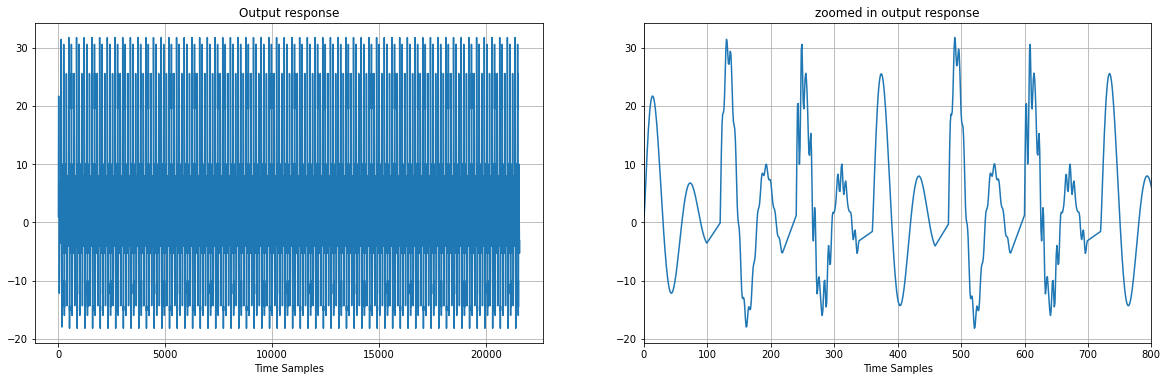

In [17]:
#for F0 =120 Hz
F0 = 120
Fs = 16000
B = 100
F1 = np.array([270,2290,3010])
Theta = []
i = 0
for i in range(3):
    k=2*(math.pi)*(F1[i]/Fs)
    Theta.append(k)
    i=i+1
k=0
print(Theta)

cost = []
i = 0
for i in range(3):
    k=math.cos(Theta[i])
    cost.append(k)
    i=i+1
k=0

R = math.exp(-1*np.pi*(B/16000))
cost = []

input = []
i = 0 
while i<5 :
    input.append((10-2*i)/10)
    i = i+1
i = 0

while i<110 :
    input.append(0)
    i = i+1    
i = 0

while i<5:
    input.append((2+2*i)/10)
    i = i+1
i = 0

display = []
ts = []
i = 0
a = 0 
for a in range(int(F0/2)):
               while i<len(input):
                   display.append(input[i])
                   ts.append(i+a*len(input))
                   i = i + 1
               i = 0

output = []

out = 0
out1 =0
out2 = 0 
output1=[]
output2=[] 
final = []
n = []
i= 0

k = 0 
while i<60 :
    j = 0
    k = k+1
    while j<100:
        out2 = out1
        out1 = out
        out = input[j]+(2*R*math.cos(Theta[0])*out1) -(R*R*out2)
        n.append(((k-1)*120)+j)
        output1.append(out)
        output.append(out)
        j = j+1
    
    j = 0
    k = k+1
    while j<100:
        out2 = out1
        out1 = out
        out = output1[j]+(2*R*math.cos(Theta[1])*out1) -(R*R*out2)
        n.append(((k-1)*120)+j)
        output2.append(out)
        output.append(out)
        j = j+1
    j = 0
    k = k+1
    while j<100:
        out2 = out1
        out1 = out
        out = output2[j]+(2*R*math.cos(Theta[2])*out1) -(R*R*out2)
        n.append(((k-1)*120)+j)
        output.append(out)
        j = j+1   
    i = i+1

output = np.array(output)
plt.rcParams["figure.figsize"] =(20,20)
plt.subplot(323)
plt.grid()
plt.xlabel("Time Samples")
plt.title("Output response")
plt.plot(n,output)

plt.subplot(324)
plt.grid()
plt.xlim(0,800)
plt.xlabel("Time Samples")
plt.title("zoomed in output response")
plt.plot(n,output)

plt.show()

Audio(output,rate = 16000)


[0.10602875205865553, 0.8992808970900783, 1.1820242359131596]


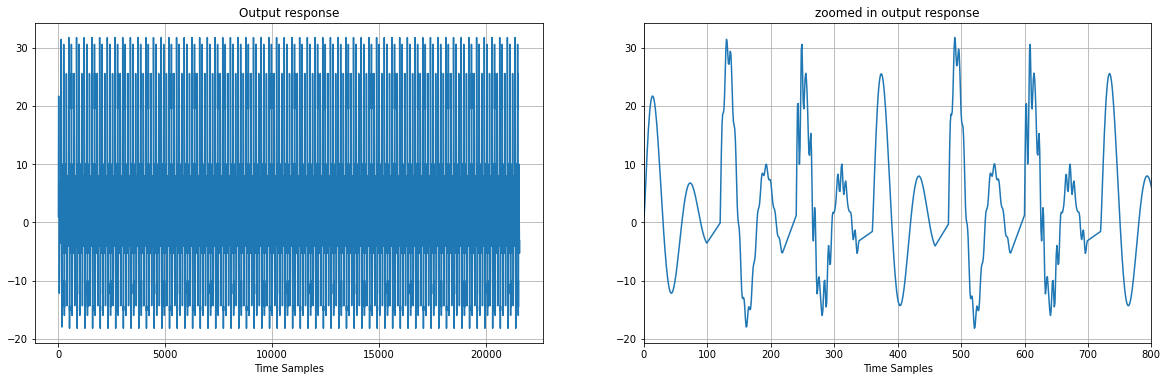

In [18]:
#for F0 =220 Hz
F0 = 220
Fs = 16000
B = 100
F1 = np.array([270,2290,3010])
Theta = []
i = 0
for i in range(3):
    k=2*(math.pi)*(F1[i]/Fs)
    Theta.append(k)
    i=i+1
k=0
print(Theta)

cost = []
i = 0
for i in range(3):
    k=math.cos(Theta[i])
    cost.append(k)
    i=i+1
k=0

R = math.exp(-1*np.pi*(B/16000))
cost = []

input = []
i = 0 
while i<5 :
    input.append((10-2*i)/10)
    i = i+1
i = 0

while i<210 :
    input.append(0)
    i = i+1    
i = 0

while i<5:
    input.append((2+2*i)/10)
    i = i+1
i = 0

display = []
ts = []
i = 0
a = 0 
for a in range(int(F0/2)):
               while i<len(input):
                   display.append(input[i])
                   ts.append(i+a*len(input))
                   i = i + 1
               i = 0

            
output = []

out = 0
out1 =0
out2 = 0 
output1=[]
output2=[] 

n = []
i= 0

k = 0 
while i<60 :
    j = 0
    k = k+1
    while j<100:
        out2 = out1
        out1 = out
        out = input[j]+(2*R*math.cos(Theta[0])*out1) -(R*R*out2)
        n.append(((k-1)*120)+j)
        output1.append(out)
        output.append(out)
        j = j+1
    j = 0
    k = k+1
    while j<100:
        out2 = out1
        out1 = out
        out = output1[j]+(2*R*math.cos(Theta[1])*out1) -(R*R*out2)
        n.append(((k-1)*120)+j)
        output2.append(out)
        output.append(out)
        j = j+1
    j = 0
    k = k+1
    while j<100:
        out2 = out1
        out1 = out
        out = output2[j]+(2*R*math.cos(Theta[2])*out1) -(R*R*out2)
        n.append(((k-1)*120)+j)
        output.append(out)
        j = j+1   
    i = i+1

output = np.array(output)

plt.rcParams["figure.figsize"] =(20,20)
plt.subplot(323)
plt.grid()
plt.xlabel("Time Samples")
plt.title("Output response")
plt.plot(n,output)

plt.subplot(324)
plt.grid()
plt.xlim(0,800)
#plt.ylim(-15,15)
plt.xlabel("Time Samples")
plt.title("zoomed in output response")
plt.plot(n,output)

plt.show()

Audio(output,rate = 16000)


[0.11780972450961724, 0.34164820107789, 0.8796459430051422]


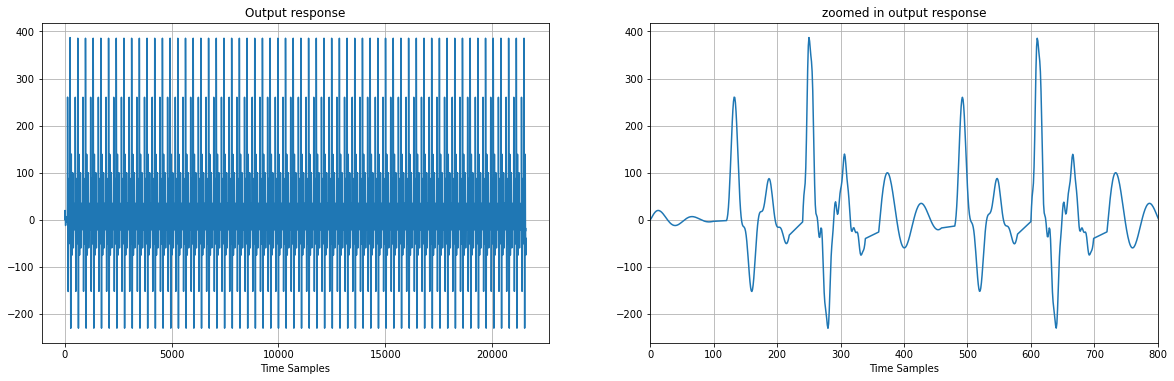

In [9]:
#for F0 =220 Hz
F0 = 220
Fs = 16000
B = 100
F1 = np.array([300,870,2240])
Theta = []
i = 0
for i in range(3):
    k=2*(math.pi)*(F1[i]/Fs)
    Theta.append(k)
    i=i+1
k=0
print(Theta)

cost = []
i = 0
for i in range(3):
    k=math.cos(Theta[i])
    cost.append(k)
    i=i+1
k=0

R = math.exp(-1*np.pi*(B/16000))
cost = []

input = []
i = 0 
while i<5 :
    input.append((10-2*i)/10)
    i = i+1
i = 0

while i<210 :
    input.append(0)
    i = i+1    
i = 0

while i<5:
    input.append((2+2*i)/10)
    i = i+1
i = 0

display = []
ts = []
i = 0
a = 0 
for a in range(int(F0/2)):
               while i<len(input):
                   display.append(input[i])
                   ts.append(i+a*len(input))
                   i = i + 1
               i = 0

            
output = []

out = 0
out1 =0
out2 = 0 
output1=[]
output2=[] 

n = []
i= 0

k = 0 
while i<60 :
    j = 0
    k = k+1
    while j<100:
        out2 = out1
        out1 = out
        out = input[j]+(2*R*math.cos(Theta[0])*out1) -(R*R*out2)
        n.append(((k-1)*120)+j)
        output1.append(out)
        output.append(out)
        j = j+1
    j = 0
    k = k+1
    while j<100:
        out2 = out1
        out1 = out
        out = output1[j]+(2*R*math.cos(Theta[1])*out1) -(R*R*out2)
        n.append(((k-1)*120)+j)
        output2.append(out)
        output.append(out)
        j = j+1
    j = 0
    k = k+1
    while j<100:
        out2 = out1
        out1 = out
        out = output2[j]+(2*R*math.cos(Theta[2])*out1) -(R*R*out2)
        n.append(((k-1)*120)+j)
        output.append(out)
        j = j+1   
    i = i+1

output = np.array(output)

plt.rcParams["figure.figsize"] =(20,20)
plt.subplot(323)
plt.grid()
plt.xlabel("Time Samples")
plt.title("Output response")
plt.plot(n,output)

plt.subplot(324)
plt.grid()
plt.xlim(0,800)
#plt.ylim(-15,15)
plt.xlabel("Time Samples")
plt.title("zoomed in output response")
plt.plot(n,output)

plt.show()

Audio(output,rate = 16000)
